# Summary

The activity described in this document is intended to be used as an introduction to using Phyphox and Python to analyze simple data sets. 
In particular this activity focuses on the relation between atmospheric pressure and height. 
First of all try to find a good elevator in a building of the maximum possible height.
Starting from the ground floor to the last floor collect a data set of pressure and save it in CVS format (name it data/phyphox_39_1_to_4.csv). After that take an other data set from last floor to the basement (name it ata/phyphox_39_4_to_neg1.csv) and save it in cvs format. 


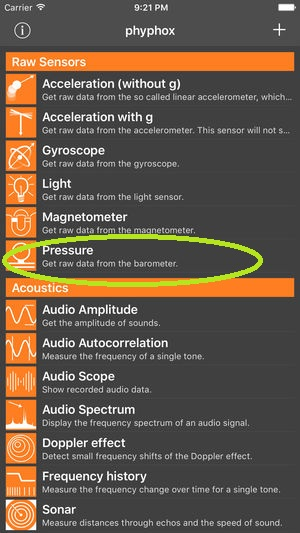

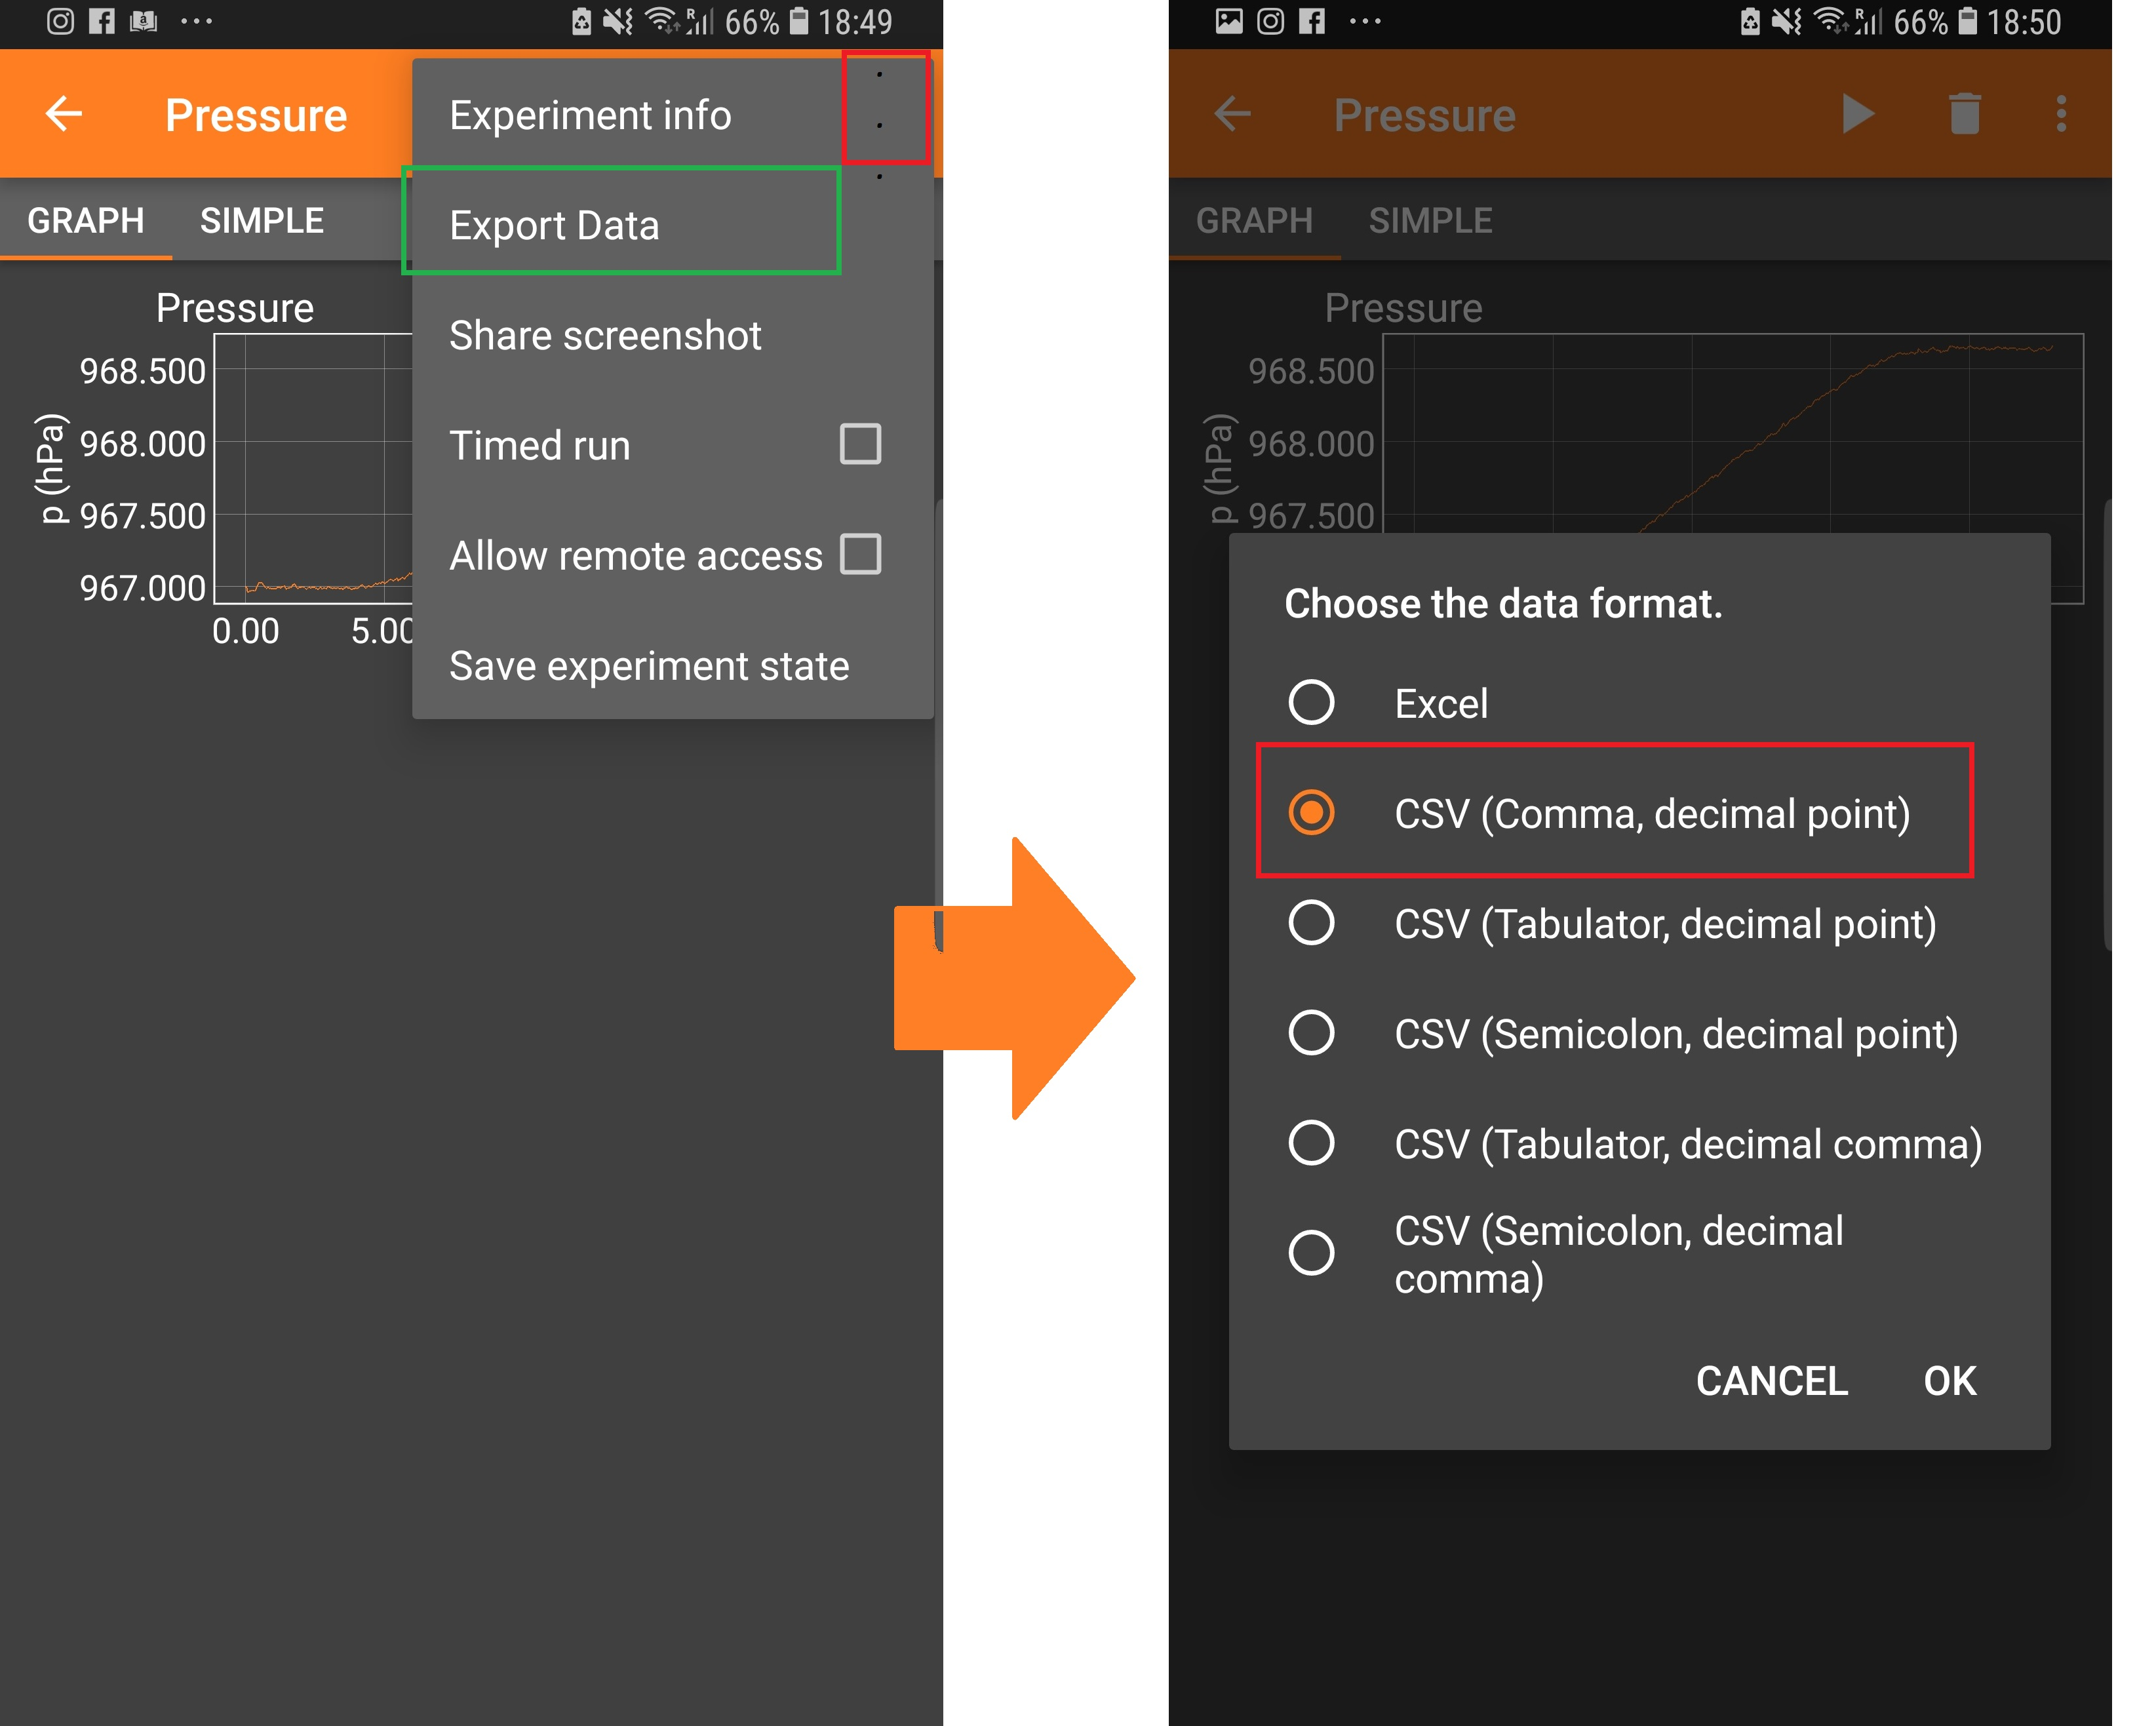

## 1. Plot the graph

In this section we will try to plot the data set and to understand the relation between pressure and altitude. 
First of all you have to remind to include the necessary libraries. After that is important to upload the data in two different matixs. If you menage to complete this procedure successfully, try to plot your data, following the example given in the previous lesson.


In [ ]:
import pandas as pd 
#pandas is for data structures and data analysis tools
import numpy as np
#numpy is for scientific computing
import matplotlib.pyplot as plt
#matplotlib is for plotting

In [ ]:
#In this section we will upload the data from phypox (.cvs format). The data are put in a matrix
# we use read_csv function from pandas to read the data into a "data frame"

#data of elevator from ground to 4th floor in matrix up
up = pd.read_csv('data/phyphox_39_1_to_4.csv', sep=';', encoding='utf-8')

#elevator from 4th floor to -1 in matrix down
down = pd.read_csv('data/phyphox_39_4_to_neg1.csv', sep=';', encoding='utf-8')

#to show the number of rows of the two matrix

print('number of rows matrix up:  ',len(up))
print('number of rows matrix down:  ', len(down))

#to print the matrix
up.head()
down.head()

In [ ]:
#In this section we will plot the data beginning from elevator from ground to 4th floor

#data from first column of matrix up are fixed as independent variable in the graph.
t1=up["Time (s)"]

#data from second column of matrix up are fixed as dependent variable in the graph.
p1=up["Pressure (hPa)"]

#command to plot the graph
plt.plot(t1,p1) #create the plot
plt.xlabel('time (s)', fontsize = 15) #label x-axis
plt.ylabel('pressure (hPa)', fontsize = 15) #label y-axis
plt.title('pressure vs time elevator 0-4', fontsize = 15) #title of the graph
plt.show



In [ ]:
#In this section we will plot the data beginning from elevator from 4th floor to -1

#data from first column of matrix up are fixed as independent variable in the graph.
t2=down["Time (s)"]

#data from second column of matrix up are fixed as dependent variable in the graph.
p2=down["Pressure (hPa)"]

#command to plot the graph
plt.plot(t2,p2, color='red') #create the plot
plt.xlabel('time (s)', fontsize = 15) #label x-axis
plt.ylabel('pressure (hPa)', fontsize = 15) #label y-axis
plt.title('pressure vs time elevator 4 -1 ', fontsize = 15) #title of the graph
plt.show


Looking the graphs make some consideration between pressure and time. 
Can you describe this relation from a mathematical point of view?
Can you explain why pressure changes in the time from a Physical point of view? Which laws are involved?


## 2. Linear function

As discussed before the data show a linear relation between pressure and time.
In this section we will try to fit the data with a linear function in order to verify this idea.


In [ ]:
fig = plt.figure(figsize=(15, 10))

#previous procedure for elevator 4 -1
part = down[(down["Time (s)"] >= 5) & (down["Time (s)"] <= 17)]
plt.xlabel('number of data', fontsize = 15)
plt.ylabel('pressure (hPa)', fontsize = 15)
plt.title('pressure vs time 4 -1', fontsize = 15)
m,b = np.polyfit(part["Time (s)"], part["Pressure (hPa)"], 1)

print ('slope:  ' +str(m))
print('intercept:  '+str(b))
plt.plot(down["Time (s)"],down["Pressure (hPa)"],part["Time (s)"], m*part["Time (s)"]+b)
plt.show



In [ ]:
fig = plt.figure(figsize=(15, 10))

#selection of the correct part of the graph to fit
part = up[(up["Time (s)"] >= 13) & (up["Time (s)"] <= 23)]


#plt.plot(part["Pressure (hPa)"])
plt.xlabel('number of data', fontsize = 15)
plt.ylabel('pressure (hPa)', fontsize = 15)
plt.title('pressure vs time', fontsize = 15)

#evaluation of slope and intercept
m,b = np.polyfit(part["Time (s)"], part["Pressure (hPa)"], 1)

#values of parmeters, graph
print ('slope:  \n'+str(h) +str(m)
print('intercept: \n'+str(h) +b)
plt.plot(up["Time (s)"],up["Pressure (hPa)"],part["Time (s)"], m*part["Time (s)"]+b)
plt.show

## 3. Altitude vs time

In this section we will reflect on the relation between altitude and time and we will calculate the height of the building using Stevin Law. Moreover we will try to calculate the height of the elevator in the time. 
Finally we will try to plot the results.


In [ ]:
#In this section we analyze the data of down matrix

#estimation of the height of the elevator vs time h1(t)

#parameters: d= air density; p01: pression at ground level; pmax= pression at 4th floor.
d=1.2 
p01=up.loc[888,"Pressure (hPa)"] #data of 888th row of the matrix 
pmax=up.loc[0,"Pressure (hPa)"]  #data of 0th row of the matrix in Pa


#calculation of h1(t)

h=(pmax-p01)/1.2/9.81*100 # height of the bulding
print('height of the building: \n'+str(h) + ' m')
h2=h-(p2-p01)/1.2/9.81*100 
h1=h-(p1-p01)/1.2/9.81*100 

#plot altezza dell'ascensore nel tempo
plt.plot(t1,h1)
plt.plot(t2,h2)
plt.xlabel('time (s)', fontsize = 15)
plt.ylabel('altitude (m)', fontsize = 15)
plt.title('altitude vs time', fontsize = 15)
plt.axhline(y=0, color='black') # draw x-axis
plt.show


Looking at the graph, can we describe how the altitude of the elevator changes in time?
Is it possible to calculate the speed of the elevator?

## 4. Speed of the elevator

As discussed above there is a linear dependece between altitude and time, which contains information about the speed of the elevator (assumed constant). 
In this section we will try to determine the speed of the elevator in both cases, using a linear fitting procedure. 


In [ ]:
fig = plt.figure(figsize=(15, 10))

#creating a new matrix from vector t1 and h1
matr=pd.concat([t1,h1],axis=1)

#select a part of the data to fit
part = matr[(matr["Time (s)"] >= 13) & (matr["Time (s)"] <= 23)]

#plot the graph 
plt.xlabel('time(s)', fontsize = 15)
plt.ylabel('altitude (m))', fontsize = 15)
plt.title('time vs altitude 0 4', fontsize = 15)

#fitting procedure
m,b = np.polyfit(part["Time (s)"], part["Pressure (hPa)"], 1)
print ('slope: speed of the elevator 0 4:  '+str(m) + ' m/s ')
plt.plot(matr["Time (s)"],matr["Pressure (hPa)"],part["Time (s)"], m*part["Time (s)"]+b)
plt.show



In [ ]:
fig = plt.figure(figsize=(15, 10))

#previous procedure for elevator 4 -1
matr2=pd.concat([t2,h2],axis=1)

part = matr2[(matr2["Time (s)"] >= 6) & (matr2["Time (s)"] <= 16)]
plt.xlabel('time(s)', fontsize = 15)
plt.ylabel('altitude (m))', fontsize = 15)
plt.title('time vs altitude 4 -1', fontsize = 15)
m,b = np.polyfit(part["Time (s)"], part["Pressure (hPa)"], 1)

print ('slope: speed of the elevator 4 -1 :  '+str(m) + ' m/s ')

plt.plot(matr2["Time (s)"],matr2["Pressure (hPa)"],part["Time (s)"], m*part["Time (s)"]+b)
plt.show

plt.show